### **Using Twitter Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Read the JSON generated from the CLI command above and create a pandas dataframe
tweets_df = pd.read_csv(r'/content/Tweets.csv')

In [4]:
# Or try this code to upload on colab
from google.colab import files

uploaded = files.upload()

In [ ]:
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df.shape

(14640, 15)

In [ ]:
tweets_df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tweets_df.value_counts(tweets_df['airline'])


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
dtype: int64

In [ ]:
tweets_df.value_counts(tweets_df['airline_sentiment_gold'])

airline_sentiment_gold
negative    32
positive     5
neutral      3
dtype: int64

In [ ]:
tweets_df['airline_sentiment_gold'].isnull().sum()

14600

In [ ]:
tweets_df.value_counts()


tweet_id            airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
567778009013178368  negative           1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith    Cancelled Flight     0              @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?  [26.37852293, -81.78472152]  2015-02-17 12:10:00 -0800  Chicago         Eastern Time (US & Canada)    1
569887533267611648  negative           0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHE

In [ ]:
tweets_df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4071
negativereason_confidence       3148
airline                            0
airline_sentiment_gold          9134
name                               0
negativereason_gold             9138
retweet_count                      0
text                               0
tweet_coord                     8466
tweet_created                      1
tweet_location                  2845
user_timezone                   2857
dtype: int64

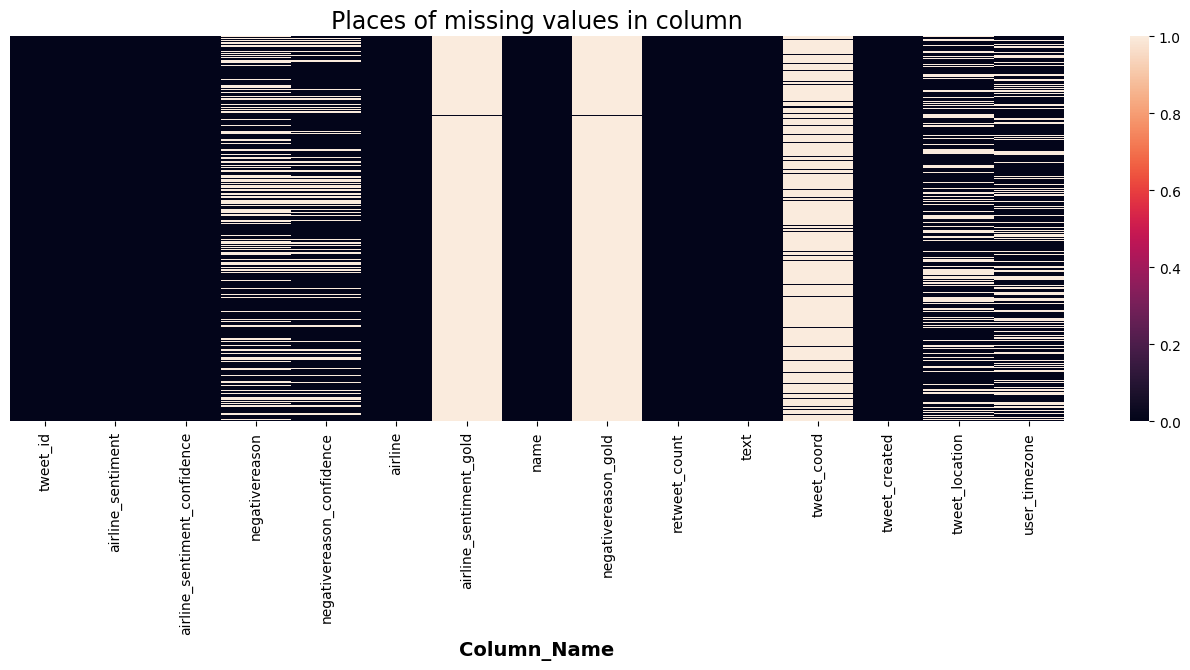

In [ ]:
#Heat Map for missing Values
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

<Axes: >

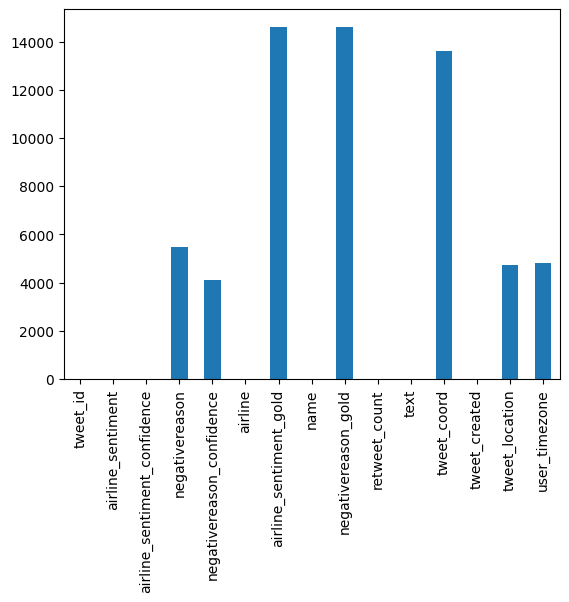

In [ ]:
tweets_df.isnull().sum().plot(kind="bar") # plotting null valu count for various columns

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= tweets_df['airline'].value_counts().head (10)

In [ ]:
print(Top_Location_Of_tweet)

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
tweets_df['text'].apply(lambda x: [item for item in x if item not in stop])
tweets_df.shape

(14640, 15)

In [ ]:
tweets_df['text'].head(10)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! -D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

In [ ]:
!pip install tweet-preprocessor

In [ ]:
#Remove unnecessary characters
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [ ]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: remove_punctuations(x))

In [ ]:
tweets_df['text'].head(10)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! -D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

In [ ]:
tweets_df['text'].isnull().sum()

0

In [ ]:
#Drop tweets that has empty text fields
tweets_df['text'].replace( '', np.nan, inplace=True)
tweets_df.dropna(subset=["text"],inplace=True)
len(tweets_df)

14640

In [ ]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,subjectivity,polarity
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.000000,0.000000
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.000000,0.000000
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0.687500,-0.390625
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.350000,0.006250
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0.383333,-0.350000


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['america', 'boston', 'california', 'diego', 'francisco', 'new', 'oakland', 'san', 'virgin', 'york'] not in stop_words.

<ipython-input-63-71514098d9d7>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




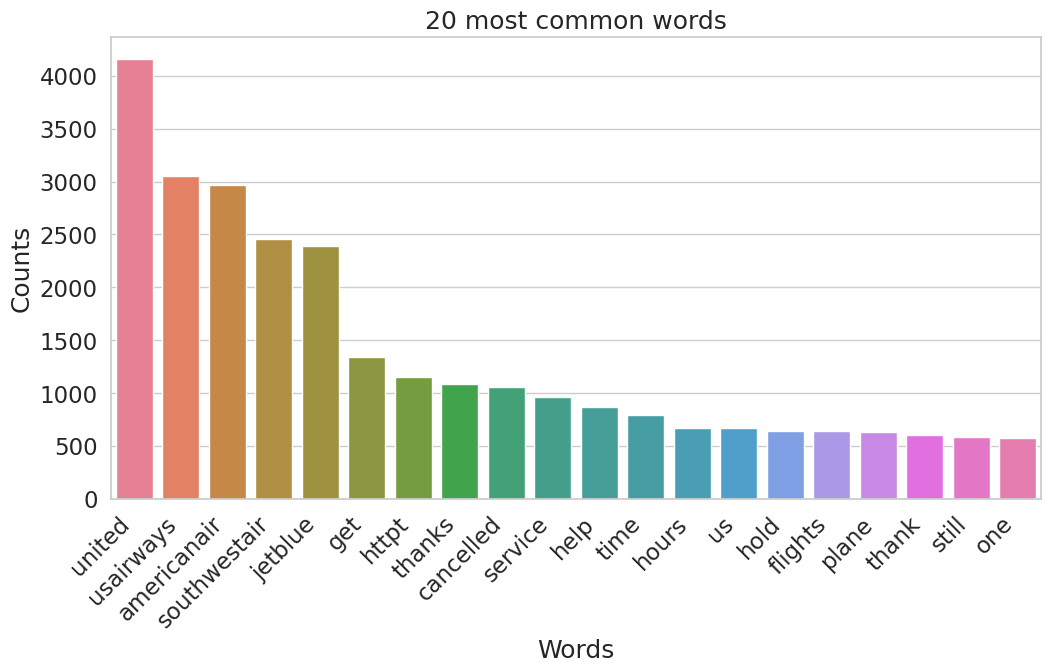

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

stop = stop + ['Virgin America', 'San Francisco', 'Boston', 'New York', 'customer', 'flight', 'airline', 'San Diego', 'Oakland', 'California']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(tweets_df['text'])

# Visualize the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

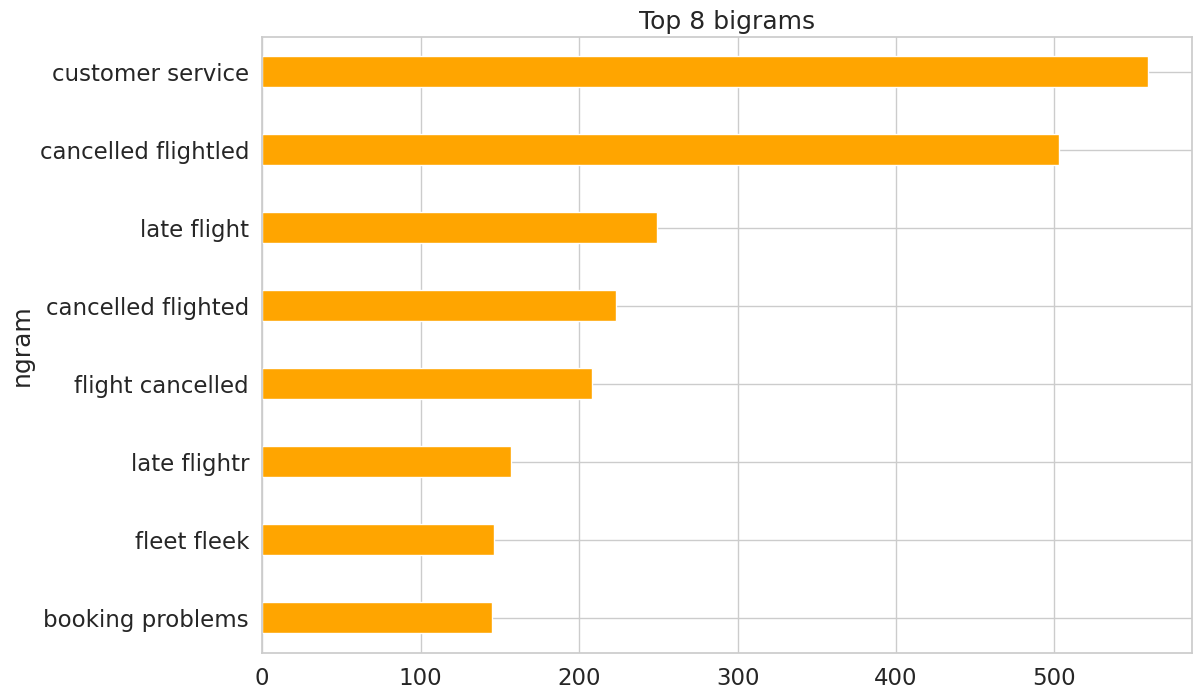

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df['text'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)

### **Use the data we have scraped in exp 2 (APSIT reviews), and clean the same**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Read the JSON generated from the CLI command above and create a pandas dataframe
tweets_df = pd.read_csv(r'/content/apsit.csv')

In [ ]:
# Or try this code to upload on colab
from google.colab import files

uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
tweets_df.head(5)

,Source,Reviewer Name,Profession,Icon1,Icon2,Icon3,Icon4,Star Icon1,Star Icon2,Time,...,Expand Review,Icon5,LikeShare,Icon6,Share,Like,No_of_Likes,Response,ResponseTime,Response_message
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,5 months ago,...,More,https://www.gstatic.com/images/icons/material/...,Like,https://www.gstatic.com/images/icons/material/...,Share,NaN,NaN,NaN,NaN,NaN
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 17 reviews · 5 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,a month ago,...,More,https://www.gstatic.com/images/icons/material/...,Share,https://www.gstatic.com/images/icons/material/...,NaN,Like,1.0,NaN,NaN,NaN
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,4 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,8.0,Response from the owner,4 years ago,Thank you. Stay connected for better Future.
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,470 photos",https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN


In [ ]:
tweets_df.shape

(175, 21)

In [ ]:
tweets_df.head()


,Source,Reviewer Name,Profession,Icon1,Icon2,Icon3,Icon4,Star Icon1,Star Icon2,Time,...,Expand Review,Icon5,LikeShare,Icon6,Share,Like,No_of_Likes,Response,ResponseTime,Response_message
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,5 months ago,...,More,https://www.gstatic.com/images/icons/material/...,Like,https://www.gstatic.com/images/icons/material/...,Share,NaN,NaN,NaN,NaN,NaN
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 17 reviews · 5 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,a month ago,...,More,https://www.gstatic.com/images/icons/material/...,Share,https://www.gstatic.com/images/icons/material/...,NaN,Like,1.0,NaN,NaN,NaN
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,4 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,8.0,Response from the owner,4 years ago,Thank you. Stay connected for better Future.
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,470 photos",https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Source            160 non-null    object 
 1   Reviewer Name     160 non-null    object 
 2   Profession        160 non-null    object 
 3   Icon1             160 non-null    object 
 4   Icon2             160 non-null    object 
 5   Icon3             160 non-null    object 
 6   Icon4             160 non-null    object 
 7   Star Icon1        160 non-null    object 
 8   Star Icon2        160 non-null    object 
 9   Time              160 non-null    object 
 10  Review            160 non-null    object 
 11  Expand Review     86 non-null     object 
 12  Icon5             160 non-null    object 
 13  LikeShare         139 non-null    object 
 14  Icon6             160 non-null    object 
 15  Share             37 non-null     object 
 16  Like              144 non-null    object 
 1

In [ ]:
tweets_df.value_counts(tweets_df['Reviewer Name'])


Reviewer Name
09_Arun Bihani       1
1216_Soham Kambli    1
Sheela Saraf         1
Shefali Shirodkar    1
Shraddha Mane        1
                    ..
Manisha Samant       1
Meenakshi M          1
Mugdha A             1
Nahid                1
vrushali patil       1
Length: 160, dtype: int64

In [ ]:
tweets_df.value_counts(tweets_df['Review'])

Review
The college is very good and road touch.\n\nThe faculty is nice and good infrastructure. …                                                                                                                                                           2
5 star college..its near by highway so clearly anyone can find.. Awsome maintance of all..helpful staff..                                                                                                                                            1
Really nice college... Excellent Infrastructure, qualified staff,  best facilities for students,  located at prime location,  highly recommended for quality education👍 …                                                                            1
One of the best and upcoming college as compared to other colleges in Thane and Mumbai...\nCollege has nice infrastructure, all classroom are provided with projectors and …                                                                         1
One o

In [ ]:
tweets_df['Review'].isnull().sum()

15

In [ ]:
tweets_df.value_counts()


Series([], dtype: int64)

In [ ]:
tweets_df.isnull().sum()

Source               15
Reviewer Name        15
Profession           15
Icon1                15
Icon2                15
Icon3                15
Icon4                15
Star Icon1           15
Star Icon2           15
Time                 15
Review               15
Expand Review        89
Icon5                15
LikeShare            36
Icon6                15
Share               138
Like                 31
No_of_Likes          31
Response             45
ResponseTime         45
Response_message     45
dtype: int64

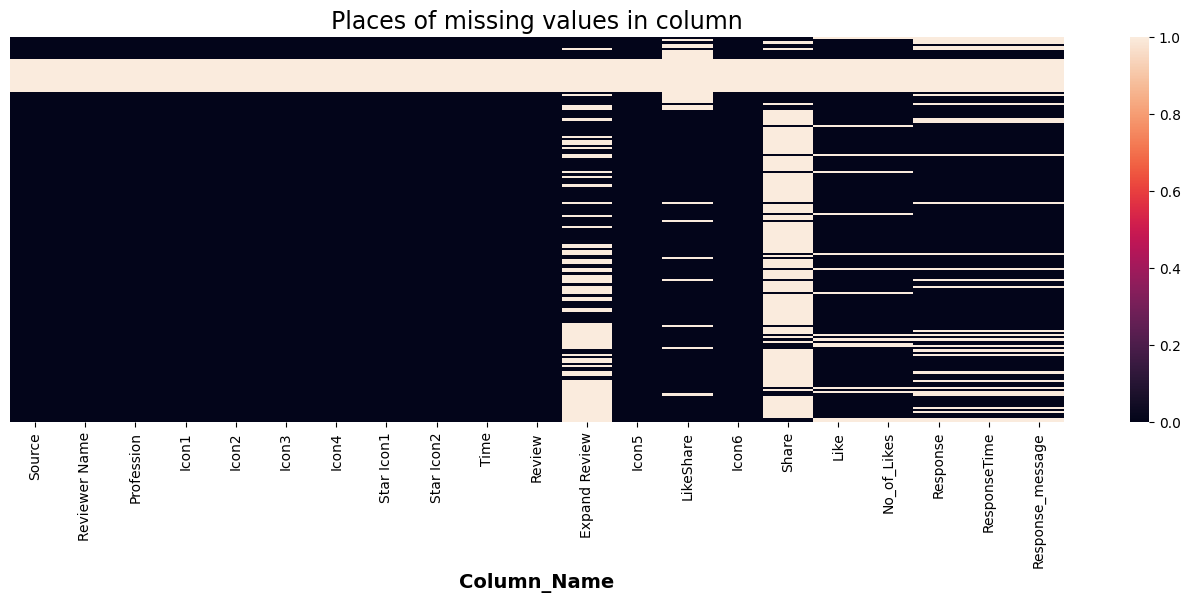

In [ ]:
#Heat Map for missing Values
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

<Axes: >

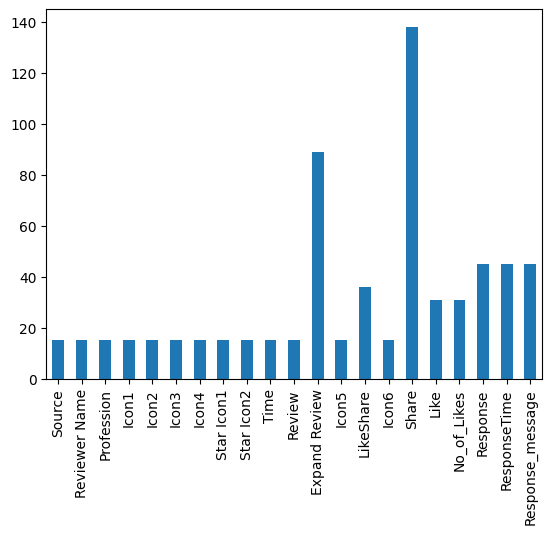

In [ ]:
tweets_df.isnull().sum().plot(kind="bar") # plotting null valu count for various columns

In [ ]:
import plotly.graph_objects as go
Top_Review= tweets_df['Review'].value_counts().head (10)

In [ ]:
print(Top_Review)

The college is very good and road touch.\n\nThe faculty is nice and good infrastructure. …                                                                                                                                                   2
Amezing ClassRooms.\nAir Conditioner & Fan Both are Available In Each Class.\n5 Floors Building. …                                                                                                                                           1
All over an excellent college.All facilities which student need.Good staff Teaching as well as managing.good infrastructure small campus but decent. Extra Curricular activities and sports is needed.placement is needed.Nearby station.    1
As soon you enter APSIT you get positive vibes. Rightly awarded recently as best upcoming engineering college. Well equipped labs, air conditioned classrooms, qualified faculty. And Mechanical department is the best..                    1
College's staff is very cooperative ,Laborat

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_df['Review'] = tweets_df['Review'].apply(lambda x: [item for item in str(x).split() if item.lower() not in stop])
# Now, if you want to check the shape of your DataFrame
print(tweets_df.shape)


(175, 21)


In [ ]:
tweets_df['Review'].head(10)

0    [Amezing, ClassRooms., Air, Conditioner, &, Fa...
1    [visited, institute, examination, center, onli...
2    [CAT, exam, center., Though, exam, go, well,, ...
3    [best, college, Thane,, growing, rapidly, acad...
4    [beside, highway, keep, check, take, right, ti...
5    [Best, college, engineering, colleges, front, ...
6    [AP, SHAH, INSTITUTE, TECHNOLOGY, college, ful...
7    [A.P., Shah, Institute, Technology,, one, best...
8    [one, best, engineering, college, Mumbai,, soo...
9    [Infrastructure, college, excellent., lot, ext...
Name: Review, dtype: object

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import string

def remove_punctuations(review_list):
    # Check if the input is a list
    if isinstance(review_list, list):
        # Join the list elements into a single string
        review_str = ' '.join(map(str, review_list))
        # Remove punctuation
        review_no_punct = ''.join([char for char in review_str if char not in string.punctuation])
        return review_no_punct.split()  # Split the string back into a list
    else:
        return review_list

In [ ]:
tweets_df['Review'] = tweets_df['Review'].apply(lambda x: remove_punctuations(x))

In [ ]:
tweets_df['Review'].head(10)

0    [Amezing, ClassRooms, Air, Conditioner, Fan, A...
1    [visited, institute, examination, center, onli...
2    [CAT, exam, center, Though, exam, go, well, ce...
3    [best, college, Thane, growing, rapidly, acade...
4    [beside, highway, keep, check, take, right, ti...
5    [Best, college, engineering, colleges, front, ...
6    [AP, SHAH, INSTITUTE, TECHNOLOGY, college, ful...
7    [AP, Shah, Institute, Technology, one, best, c...
8    [one, best, engineering, college, Mumbai, soon...
9    [Infrastructure, college, excellent, lot, extr...
Name: Review, dtype: object

In [ ]:
tweets_df['Review'].isnull().sum()

0

In [ ]:
#Drop tweets that has empty text fields
tweets_df['Review'].replace( '', np.nan, inplace=True)
tweets_df.dropna(subset=["Review"],inplace=True)
len(tweets_df)

175

In [ ]:
tweets_df['Review'].head(10)

0    [Amezing, ClassRooms, Air, Conditioner, Fan, A...
1    [visited, institute, examination, center, onli...
2    [CAT, exam, center, Though, exam, go, well, ce...
3    [best, college, Thane, growing, rapidly, acade...
4    [beside, highway, keep, check, take, right, ti...
5    [Best, college, engineering, colleges, front, ...
6    [AP, SHAH, INSTITUTE, TECHNOLOGY, college, ful...
7    [AP, Shah, Institute, Technology, one, best, c...
8    [one, best, engineering, college, Mumbai, soon...
9    [Infrastructure, college, excellent, lot, extr...
Name: Review, dtype: object

In [ ]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,Source,Reviewer Name,Profession,Icon1,Icon2,Icon3,Icon4,Star Icon1,Star Icon2,Time,...,Expand Review,Icon5,LikeShare,Icon6,Share,Like,No_of_Likes,Response,ResponseTime,Response_message
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,5 months ago,...,More,https://www.gstatic.com/images/icons/material/...,Like,https://www.gstatic.com/images/icons/material/...,Share,NaN,NaN,NaN,NaN,NaN
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 17 reviews · 5 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,a month ago,...,More,https://www.gstatic.com/images/icons/material/...,Share,https://www.gstatic.com/images/icons/material/...,NaN,Like,1.0,NaN,NaN,NaN
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,4 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,8.0,Response from the owner,4 years ago,Thank you. Stay connected for better Future.
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,470 photos",https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN


In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

In [ ]:
tweets_df['Review']

0      [Amezing, ClassRooms, Air, Conditioner, Fan, A...
1      [visited, institute, examination, center, onli...
2      [CAT, exam, center, Though, exam, go, well, ce...
3      [best, college, Thane, growing, rapidly, acade...
4      [beside, highway, keep, check, take, right, ti...
                             ...                        
170    [One, great, institute, conducting, competitiv...
171    [One, best, engineering, colleges, ever, seen,...
172    [nice, college, faculties, helpful, good, hosp...
173    [Nice, college, cafe, college, clean, n, nice,...
174                    [Four, Years, Vivid, Experiences]
Name: Review, Length: 175, dtype: object

In [ ]:
tweets_df.head()

,Source,Reviewer Name,Profession,Icon1,Icon2,Icon3,Icon4,Star Icon1,Star Icon2,Time,...,Expand Review,Icon5,LikeShare,Icon6,Share,Like,No_of_Likes,Response,ResponseTime,Response_message
0,https://lh3.googleusercontent.com/a-/ALV-UjWHb...,Saurabh Kanade,Local Guide · 37 reviews · 20 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,5 months ago,...,More,https://www.gstatic.com/images/icons/material/...,Like,https://www.gstatic.com/images/icons/material/...,Share,NaN,NaN,NaN,NaN,NaN
1,https://lh3.googleusercontent.com/a/ACg8ocKaRp...,Rasika Pujare,Local Guide · 18 reviews · 170 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjV4l...,V S,Local Guide · 17 reviews · 5 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,a month ago,...,More,https://www.gstatic.com/images/icons/material/...,Share,https://www.gstatic.com/images/icons/material/...,NaN,Like,1.0,NaN,NaN,NaN
3,https://lh3.googleusercontent.com/a-/ALV-UjUV4...,Sneha Yadav,Local Guide · 7 reviews · 61 photos,https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,4 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,8.0,Response from the owner,4 years ago,Thank you. Stay connected for better Future.
4,https://lh3.googleusercontent.com/a-/ALV-UjWll...,AJP Travel,"Local Guide · 112 reviews · 3,470 photos",https://www.gstatic.com/images/icons/material/...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,https://maps.gstatic.com/consumer/images/icons...,2 years ago,...,More,https://www.gstatic.com/images/icons/material/...,NaN,https://www.gstatic.com/images/icons/material/...,Share,Like,7.0,NaN,NaN,NaN


<ipython-input-31-f3c247cced41>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


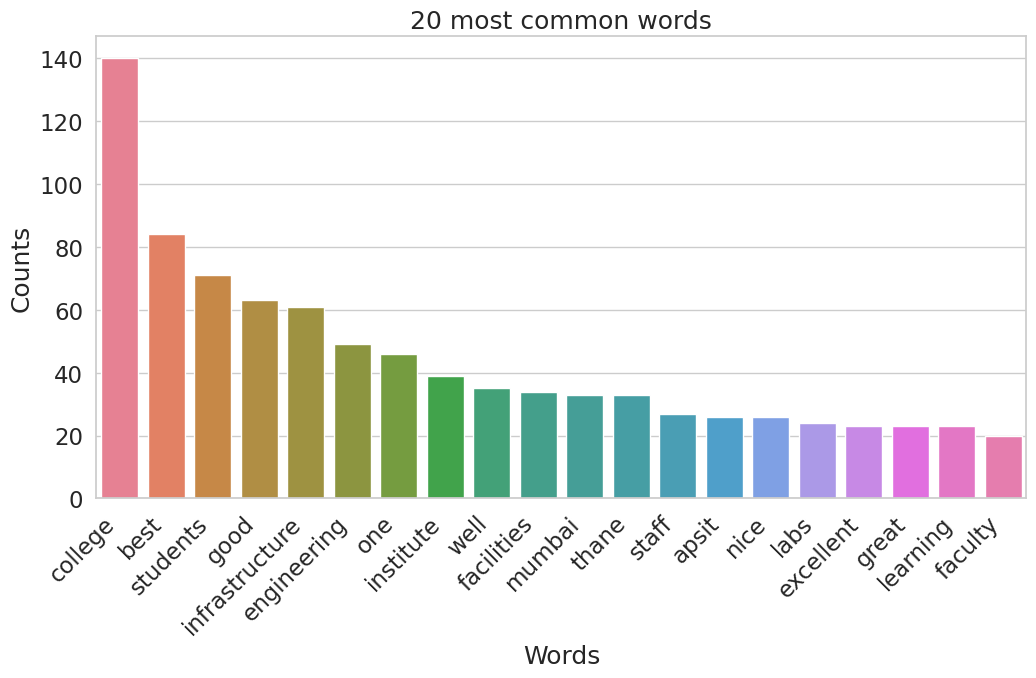

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

# Assuming 'Review' column is a list of words, join them into a string
tweets_df['Review'] = tweets_df['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

stop = stop + ['is', 'was', 'has', 'have', 'to', 'from']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(tweets_df['Review'])

# Visualize the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

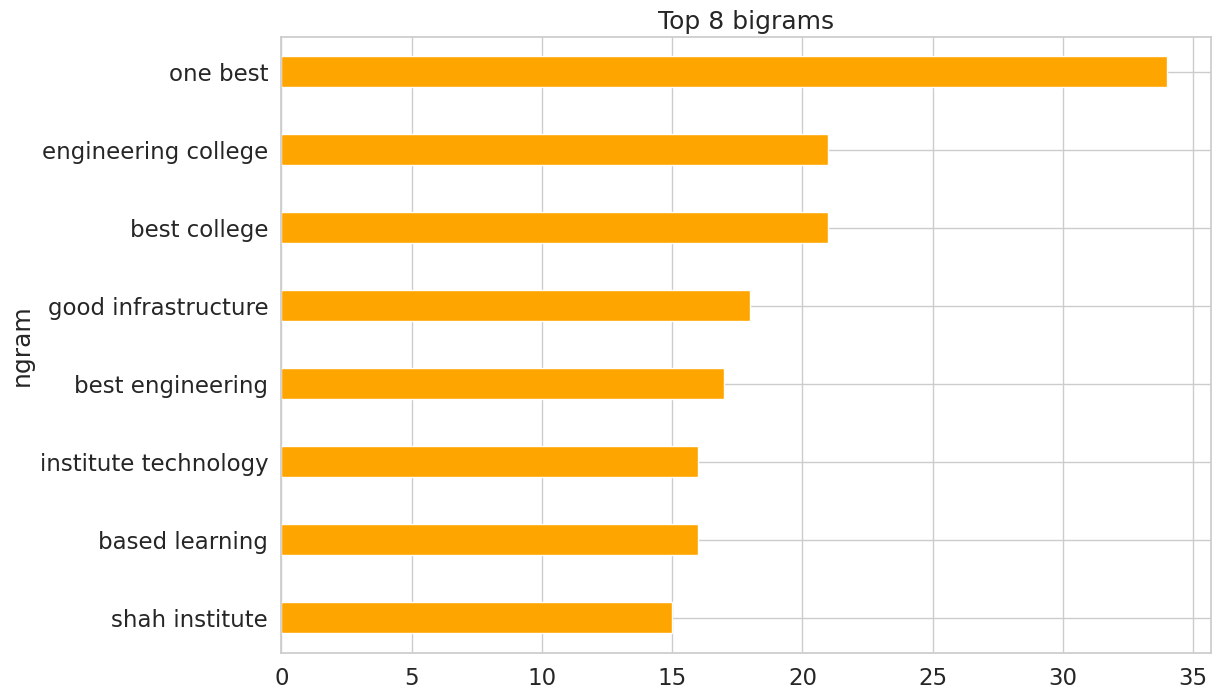

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words=stop).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df['Review'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)